In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import numpy as np
import scipy
import seaborn as sn

In [ ]:
df = pd.read_csv('imputed_data.csv', sep=',')

In [ ]:
df.head()

,WEEK,DATE,PWEIGHT,EEDUC,RHISPANIC,RRACE,THHLD_NUMKID,THHLD_NUMPER,INCOME,CURFOODSUF,TSPNDFOOD,TSPNDPRPD,EST_ST,COMPAVAIL,INTRNTAVAIL,SCHLHRS,RACE_ETHNICITY
0,13,8/19/2020,1149.7200,7,1,1,3,5,8,2,400.0,75.0,1,2,2,4,White
1,13,8/19/2020,1028.2380,7,1,1,2,4,4,1,200.0,250.0,1,1,1,2,White
2,13,8/19/2020,193.4841,6,1,1,3,5,6,1,200.0,20.0,2,1,3,1,White
3,13,8/19/2020,136.7394,4,2,4,2,4,5,2,200.0,100.0,2,1,1,3,Hispanic
4,13,8/19/2020,51.5445,4,1,1,1,2,2,3,100.0,15.0,6,2,1,3,White


In [ ]:
len(df)

318989

In [ ]:
corr_df = df.drop(['WEEK', 'DATE', 'PWEIGHT', 'SCHLHRS'], axis=1)
corr_df.head()

,EEDUC,RHISPANIC,RRACE,THHLD_NUMKID,THHLD_NUMPER,INCOME,CURFOODSUF,TSPNDFOOD,TSPNDPRPD,EST_ST,COMPAVAIL,INTRNTAVAIL,RACE_ETHNICITY
0,7,1,1,3,5,8,2,400.0,75.0,1,2,2,White
1,7,1,1,2,4,4,1,200.0,250.0,1,1,1,White
2,6,1,1,3,5,6,1,200.0,20.0,2,1,3,White
3,4,2,4,2,4,5,2,200.0,100.0,2,1,1,Hispanic
4,4,1,1,1,2,2,3,100.0,15.0,6,2,1,White


In [ ]:
corr_df['RACE_ETHNICITY'] = corr_df['RACE_ETHNICITY'].factorize()[0]
corr_df.head()

,EEDUC,RHISPANIC,RRACE,THHLD_NUMKID,THHLD_NUMPER,INCOME,CURFOODSUF,TSPNDFOOD,TSPNDPRPD,EST_ST,COMPAVAIL,INTRNTAVAIL,RACE_ETHNICITY
0,7,1,1,3,5,8,2,400.0,75.0,1,2,2,0
1,7,1,1,2,4,4,1,200.0,250.0,1,1,1,0
2,6,1,1,3,5,6,1,200.0,20.0,2,1,3,0
3,4,2,4,2,4,5,2,200.0,100.0,2,1,1,1
4,4,1,1,1,2,2,3,100.0,15.0,6,2,1,0


In [ ]:
corrMatrix = corr_df.corr(method='spearman')
print(corrMatrix)

                   EEDUC  RHISPANIC     RRACE  THHLD_NUMKID  THHLD_NUMPER  \
EEDUC           1.000000  -0.157011 -0.030891      0.008461     -0.048623   
RHISPANIC      -0.157011   1.000000  0.013218      0.016299      0.062763   
RRACE          -0.030891   0.013218  1.000000     -0.020671      0.007747   
THHLD_NUMKID    0.008461   0.016299 -0.020671      1.000000      0.710386   
THHLD_NUMPER   -0.048623   0.062763  0.007747      0.710386      1.000000   
INCOME          0.493582  -0.161121 -0.111452      0.020478      0.050822   
CURFOODSUF     -0.297057   0.118392  0.118460      0.020435      0.024259   
TSPNDFOOD       0.032219   0.048166  0.028610      0.164805      0.212220   
TSPNDPRPD       0.066200   0.047864  0.037227      0.037906      0.074144   
EST_ST         -0.001315  -0.068231 -0.073590      0.022011      0.010703   
COMPAVAIL      -0.119278   0.047866  0.027009      0.096496      0.071233   
INTRNTAVAIL    -0.136553   0.056984  0.046642      0.057880      0.050960   

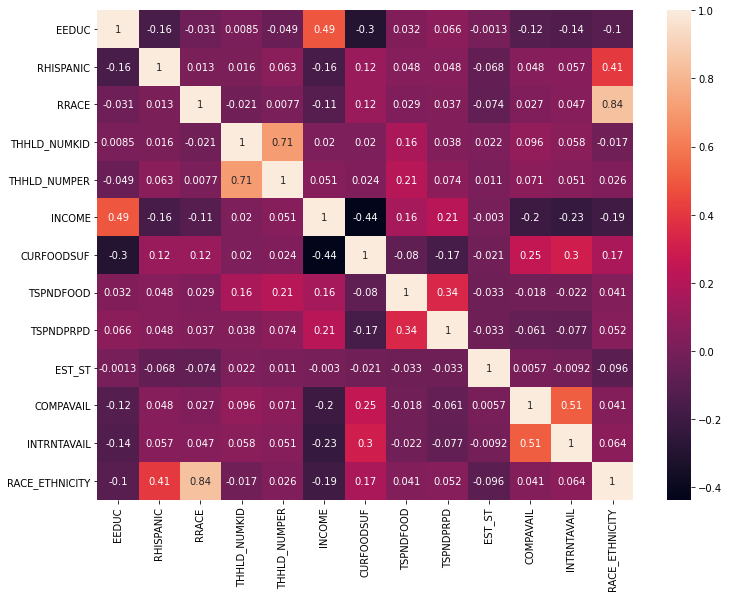

In [ ]:
plt.figure(figsize=(12, 9))
sn.heatmap(corrMatrix, annot=True)
plt.savefig("corr_matrix")
plt.show()
